# Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data

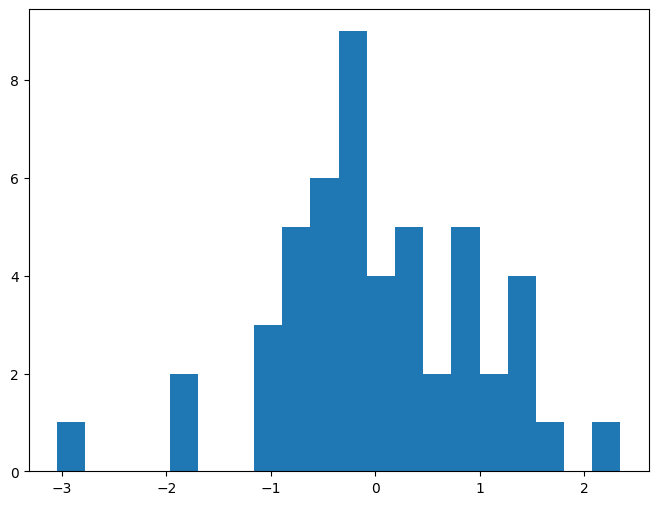

In [13]:
data = np.random.normal(size=(1, 50))

plt.figure(figsize=(8, 6))
plt.hist(data.flatten(), bins=20)
plt.show()

### With scipy

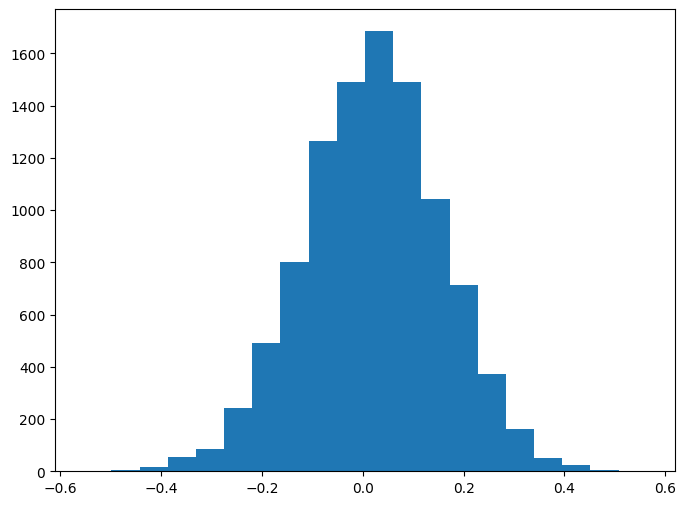

In [14]:
from scipy.stats import bootstrap

bts = bootstrap(data, np.mean, confidence_level=0.95, n_resamples=10000)

plt.figure(figsize=(8, 6))
plt.hist(bts.bootstrap_distribution, bins=20)
plt.show()

### From scratch

In [38]:
class bootstrap:
    def __init__(self, data, statistic, n_resamples=1000):
        self.data = data
        self.n_features, self.n_samples = data.shape
        self.statistic = statistic
        self.n_resamples = n_resamples
        self.bootstrap_distribution = np.empty((self.n_features, self.n_resamples))

        self.create_bootstrap_distribution()

    def create_bootstrap_distribution(self):
        for features_idx in range(self.n_features):
            bootstrap_features = np.empty(self.n_resamples)
            for sample_idx in range(self.n_resamples):
                bootstrap_data = np.random.choice(self.data[features_idx], self.n_samples, replace=True)
                stat = self.statistic(bootstrap_data)
                bootstrap_features[sample_idx] = stat
            self.bootstrap_distribution[features_idx] = bootstrap_features

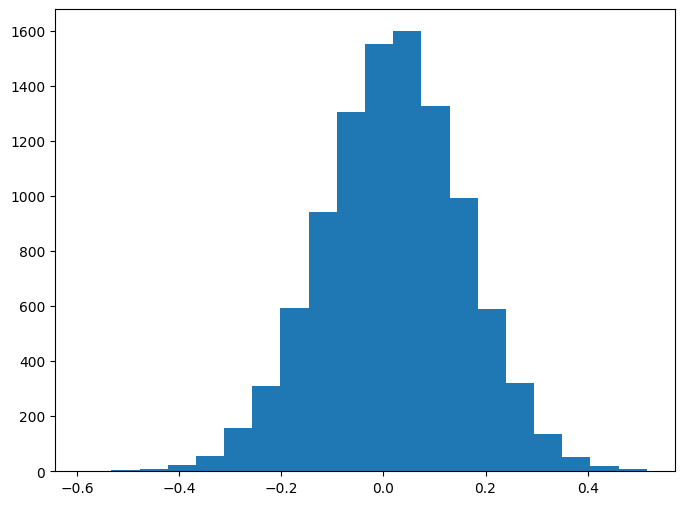

In [39]:
bts = bootstrap(data, np.mean, n_resamples=10000)

plt.figure(figsize=(8, 6))
plt.hist(bts.bootstrap_distribution[0], bins=20)
plt.show()